# PELEVS usage example

Here we import all the libraries we are going to need to use

In [1]:
import pelevs

# 1. Prepare receptor and ligands

The first step as always should be preparing the inputs for the library. In this case we need:
1. Protonated receptor at the corresponding pH with PROPKA tool.
2. A csv file with the ligands in SMILES format and with an index to identify the ligands.

In this case the files are located inside original_input/.

Having all the prerequisites we can begin to use the library. First we need the imports


---

In [9]:
receptor_path = 'original_input/gpcr.pdb'
ligands_path = 'original_input/dataset_gpcr.csv'

# Initialize inputPrepare object
input_prepare = pelevs.inputPrepare.InputPreparation(ligands_path,receptor_path)

# Set up a LigPrep job 
input_prepare.setUpLigPrepJob(pH=7.2, pH_tolerance=0.5, conformations=5)

 -     Ligand file is already in 1_input_files/ligands.


---

With the previous code we have generated a Schrödinger job to send to the local machines with license. What is recommended is to compress in a tar the folder 2_ligprep_job/job into job.tar

```tar -cvf job.tar job```

Once decompresed you can just run 

```bash ligprep.sh```

Once the job is finished you can download the job folder entirely to the same directory.
With this we are ready to being the docking.

---

# 2. Docking

To begin the docking we first need to know the docking tool we are going to use. This library is prepared for glide, rdock and equibind. In this case we are going to use glide. 

In order to have a thorough and accurate grid, the zip file should be generated using Maestro. In this case, we coppied the file into original_input/.

In [2]:
grid_path = 'original_input/gpcr_grid.zip'

# We generate a DockingJob object
glide = pelevs.dockingJob.DockingJob()

# We pass the grid file to the method
glide.setGlideDocking(grid_path, output_models=10)

 - Glide job generated successfully with grid original_input/gpcr_grid.zip and forcefield OPLS_2005.


---

Again, with the previous code we have generated a Schrödinger job to send to the local machines with license. What is recommended is to compress in a tar the folder 3_ligprep_job/job into job.tar.

Once decompresed you can just run 

```bash glide_job.sh```

Once the job is finished you can download the job folder entirely to the same directory.
With this we are ready to analyze some results and prepare the PELE simulations.

---

 - Glide docking results found
 - Csv information imported and sorted (self.calculated_data)
 - Correlation image generated succesfully
 - Molecular weight plots generated succesfully.
 - Images stored at 3_docking_job/images

 - Time distribution figure plotted correctly.


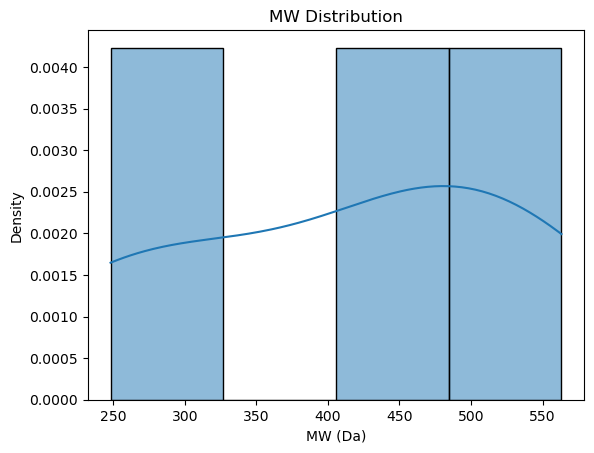

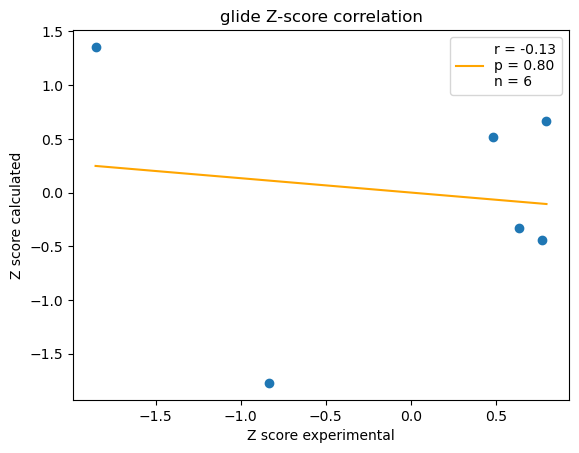

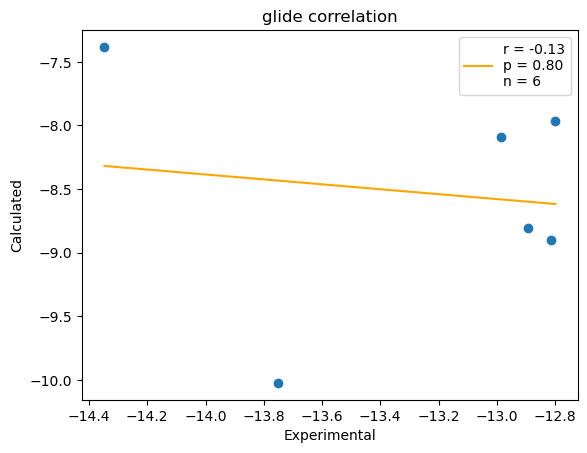

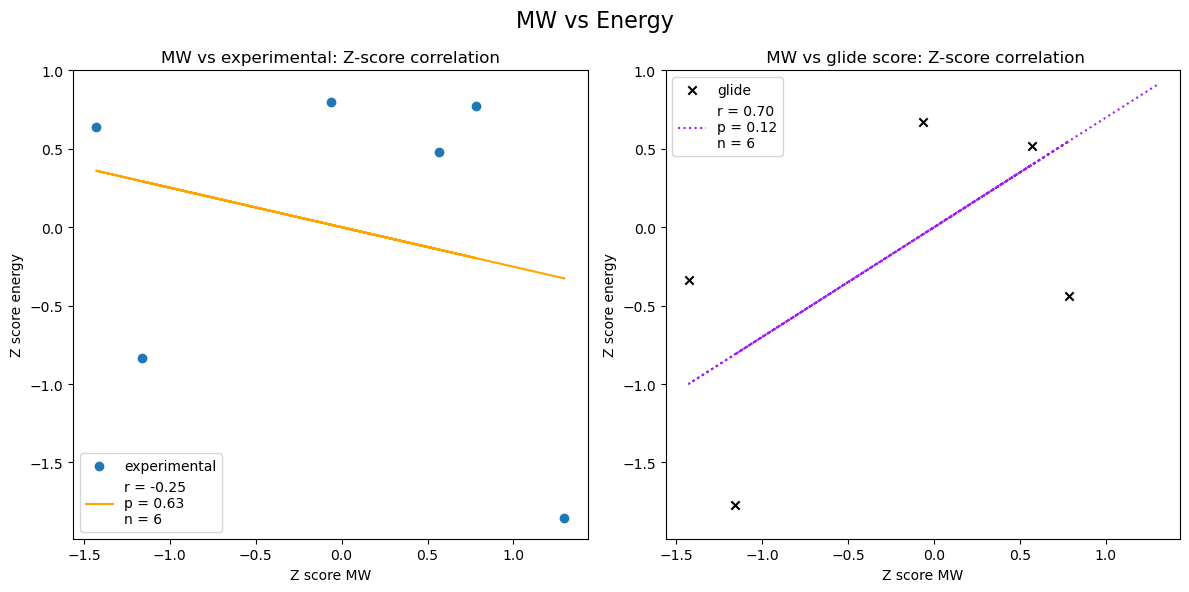

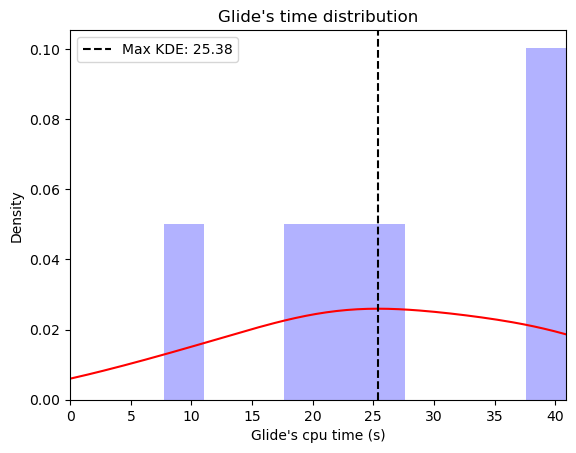

In [2]:
experimental_data_path = 'original_input/dataset_ki.csv'

# We generate a DockingAnalyzer object
analysis = pelevs.dockingAnalysis.DockingAnalyzer()

# We use the method glideAnalysis to obtain some information about the docking
analysis.glideAnalysis(experimental_data_path,'dG')

---

Now that we have docked the ligands and we have analyzed the results, we are ready to prepare the PELE simulations.

# 3. PELE simulations

Here we have a variety of possibilities to launch the PELE simulation from which to choose. In this example we will only make one specific case.


---

In [2]:
# Initiallize the object
pele = pelevs.peleJob.PELEJob()

# Generating a xlong protocol simulation
pele.setGlideToPELESimulation(rescoring_method='xlong')

 - Sampling chosen: xlong.
 - Jobs will be stored at: 4_pele_simulation/pele_simulation/xlong
 - Splitting the outputted maegz file into individual pdbs.
 - Only the best tautomer/stereoisomer is saved.
 - Merging the 6 ligands to the receptor...
 - Generating yaml and run files.
 - Job created to run at MN4.
 - Send pele_simulation_folder to perform the simulations and run:
   bash general_runner.sh.
